# EDA Case Study

This analysis is divided into three main parts:
1) Data sourcing
2) Data cleaning
3) Data visualisation

# Data Sourcing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the csv file
df1 = pd.read_csv("loan.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11752\2753695790.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("loan.csv")


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
#first few rows of the dataset
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

Some columns have large number of missing values, let's check those out.

In [5]:
#null count of each variables in df1
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
#null percentage of each column in df1
round(df1.isnull().sum()/len(df1.index),2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

Some columns have 100% missing values, we need to drop them first.

In [7]:
#removing columns having more than 90% of missing values
df1 = df1.drop(df1.columns[100*(df1.isnull().sum()/len(df1.index)) > 90], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [8]:
#calculating the null percentage again
round(df1.isnull().sum()/len(df1.index),2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

The column desc contains the loan description provided by the borrower while applying for the loan, which is not of much importance in our analysis. Secondly, months since last delinquent column represents the number of months passed since the borrower's last delinquency. We are dropping these columns because that data is generated months after the loan has been approved, hence it can not be used as a predictor of default at the time of loan approval.


In [9]:
#those columns have 33% and 65% missing values 
#hence we are dropping those two columns
df1 = df1.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [10]:
#calculating the null percentage again
round(df1.isnull().sum()/len(df1.index),2)*100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

There are some more columns with few missing values, but let's ignore them as of now because the percentage value is really low, we don't need to impute all missing values anyway. Now, let's check whether rows have missing values or not.

In [11]:
#finding null values in rows
df1.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [12]:
#checking whether some rows have more than 5 missing values
len(df1[df1.isnull().sum(axis = 1) > 5].index)

0

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
#column int_rate is character type, let's convert it to float
df1['int_rate'] = df1['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [15]:
#checking the data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

# Data Analysis

The objective of the analysis clearly is to identify the variables that we want to consider for analysis. To identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. 

Now, there are broadly three types of variables: 1. Those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

In [16]:
behaviour_var =  ["delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", 
                  "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", 
                  "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d",
                  "last_pymnt_amnt", "last_credit_pull_d", "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [17]:
#let's remove the behaviour variables from analysis
df = df1.drop(behaviour_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [18]:
#also, we will not be able to use the variables zip code, address, state etc.
#the variable 'title' is derived from the variable 'purpose'
#thus let get rid of all these variables as well
df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

Let's have a look at the target variable loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [19]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

We can see that fully paid comprises most of the loans. The ones marked 'current' are neither fully paid not defaulted, so let's get rid of the current loans. Also, let's tag the other two values as 0 or 1. 

In [20]:
#filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

#converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

#summarising the values
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

# Univariate Analysis

Let's look at the overall default rate.

In [21]:
#default rate
round(np.mean(df['loan_status']), 2)

0.15

Overall default rate is about 15%. Let's visualise them across categorical values.

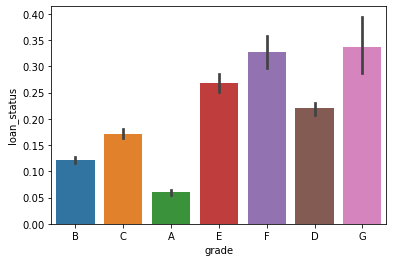

In [22]:
#plotting default rates across grade of the loan
sns.barplot(x ='grade', y ='loan_status', data = df)
plt.show()

In [23]:
#lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x = cat_var, y ='loan_status', data = df,orient ='v')
    plt.show()

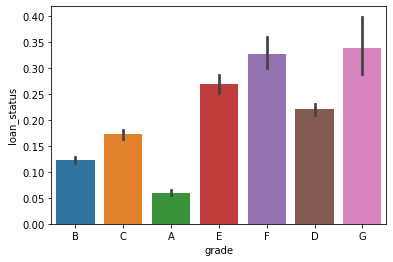

In [24]:
#compare default rates across grade of loan
plot_cat('grade')

Clearly, as the grade of loan goes from A to G, the default rate increases which is expected because the grade is decided by Lending Club based on the riskiness of the loan. 

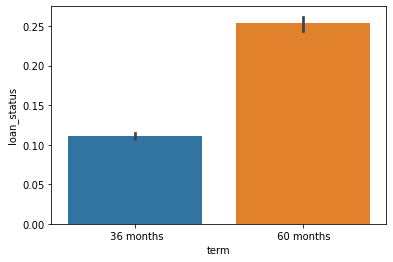

In [25]:
#compare default rate across terms of loan
plot_cat('term')

Clearly, 60 months loans default more than 36 months loans. Hence, we should start giving 36 months loans more compared to 60.

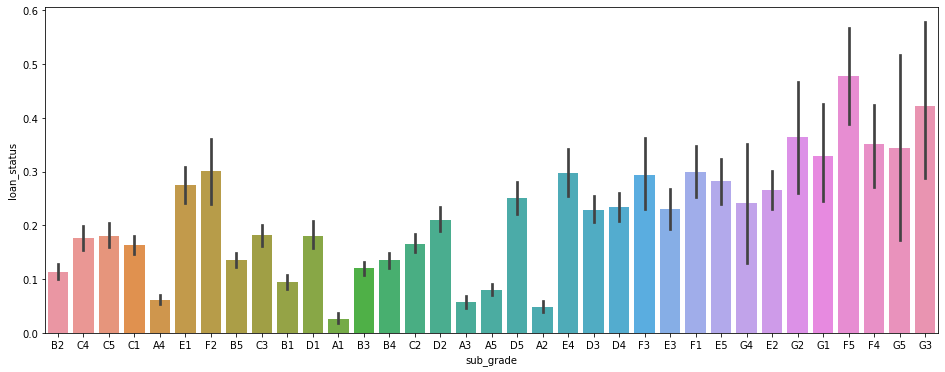

In [26]:
#sub-grade: as expected - A1 is better than A2 better than A3 and so on 
plt.figure(figsize = (16, 6))
plot_cat('sub_grade')

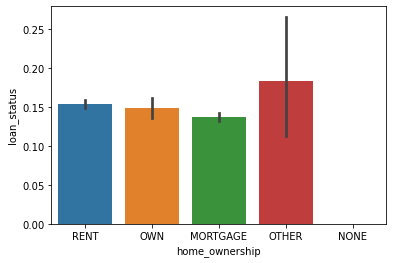

In [27]:
#home ownership: not a great discriminator
plot_cat('home_ownership')

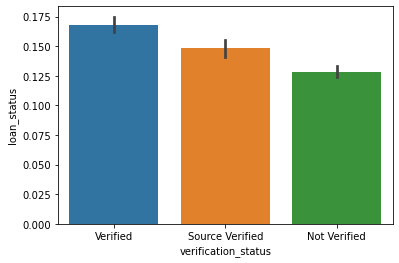

In [28]:
#verification_status: surprisingly, verified loans default more than not verified
plot_cat('verification_status')

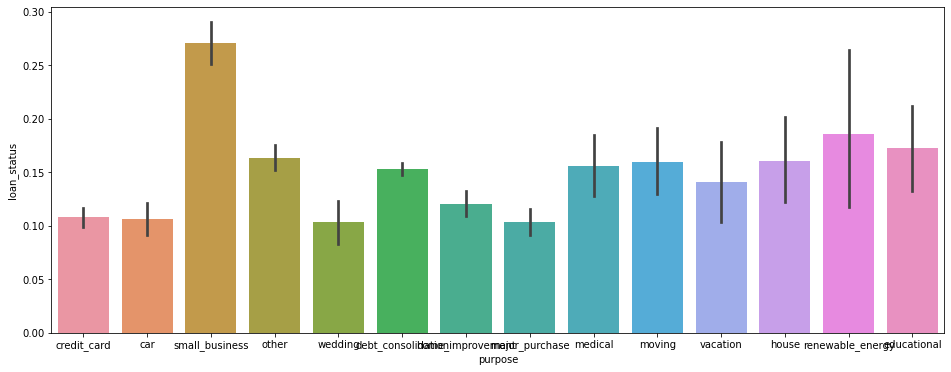

In [29]:
#purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize = (16, 6))
plot_cat('purpose')

In [30]:
#let's also observe the distribution of loans across years
#first lets convert the year column into datetime and then extract year and month from it
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [31]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [32]:
#extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [33]:
#let's first observe the number of loans granted across years
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

We can see that number of loans has increased steadily over the years.

In [34]:
#number of loans across months
df.groupby('month').month.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: month, dtype: int64

Maximum number of loans are granted in the month of December.

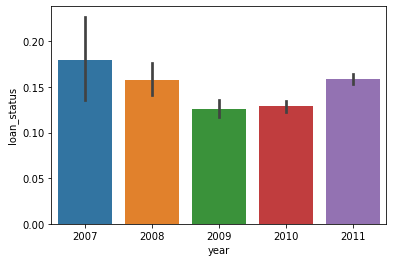

In [35]:
#lets compare the default rates across years
#the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010
plot_cat('year')

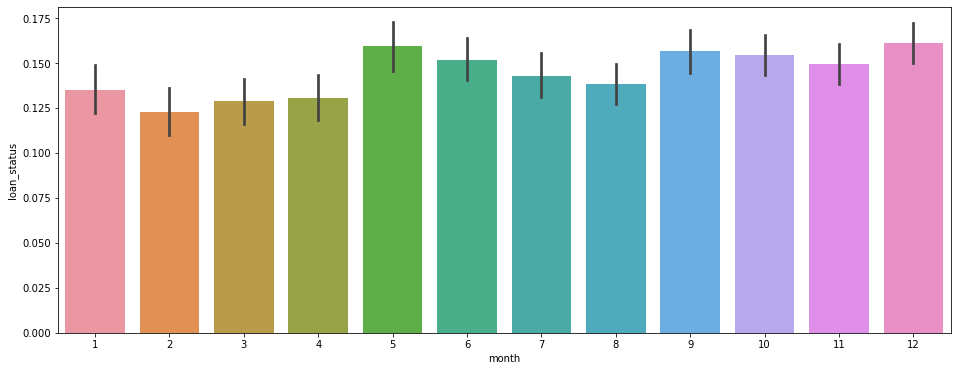

In [36]:
#comparing default rates across months: not much variation across months
plt.figure(figsize = (16, 6))
plot_cat('month')

Now, let's analyse the variation of default rate across continuous variables.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


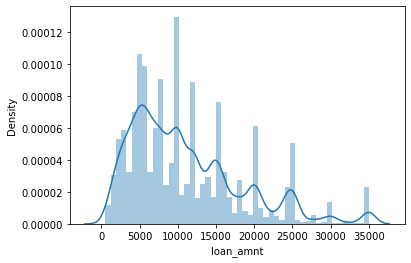

In [37]:
#loan amount: the median loan amount is around 10,000
sns.distplot(df['loan_amnt'])
plt.show()

To get a clear picture, Let's bin the loan amount variable into small, medium, high and very high.

In [38]:
#binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [39]:
df['loan_amnt'].value_counts()

medium       20675
high          7696
low           7444
very high     2762
Name: loan_amnt, dtype: int64

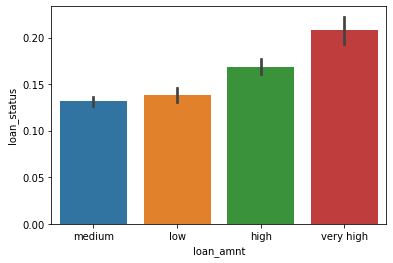

In [40]:
#let's compare the default rates across loan amount type
#higher the loan amount, higher the default rate
plot_cat('loan_amnt')

In [41]:
#let's also convert funded amount invested to bins
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

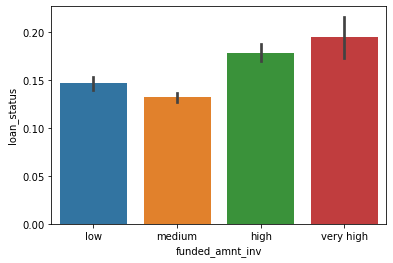

In [42]:
#funded amount invested
plot_cat('funded_amnt_inv')

In [43]:
#lets also convert interest rate to low, medium, high
#binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

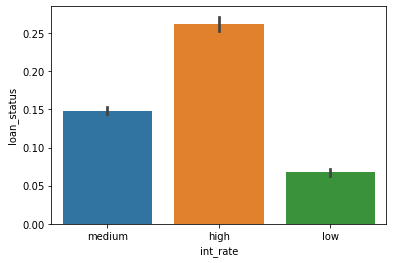

In [44]:
#comparing default rates across rates of interest
#high interest rates default more, as expected
plot_cat('int_rate')

In [45]:
#debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    
df['dti'] = df['dti'].apply(lambda x: dti(x))

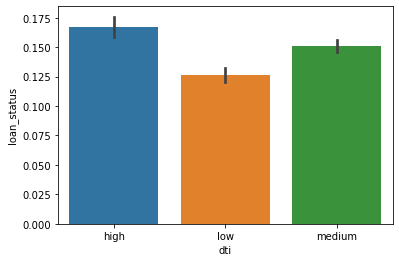

In [46]:
#comparing default rates across debt to income ratio
#high dti translates into higher default rates, as expected
plot_cat('dti')

In [47]:
#segregating the funded amount into the respective bins into Low, Medium and High 
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

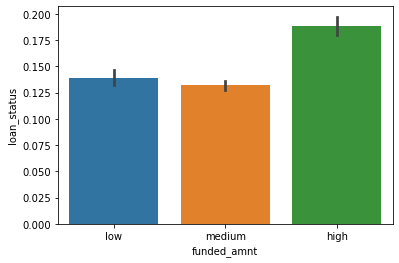

In [48]:
plot_cat('funded_amnt')

In [49]:
#installment dividing into the respective bins into Low, Medium, High and very High
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

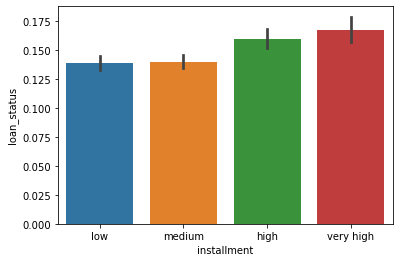

In [50]:
#comparing default rates across installment
#the higher the installment amount, the higher the default rate
plot_cat('installment')

In [51]:
#annual income dividing into the respective bins into Low, Medium, High and very High
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

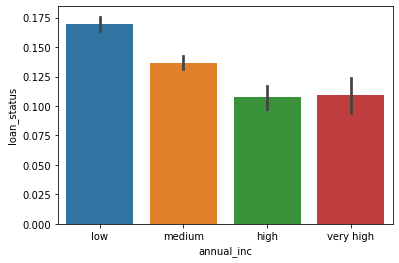

In [52]:
#annual income and default rate
#lower the annual income, higher the default rate
plot_cat('annual_inc')

# Segmented Univariate Analysis

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan: home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc. 

This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.

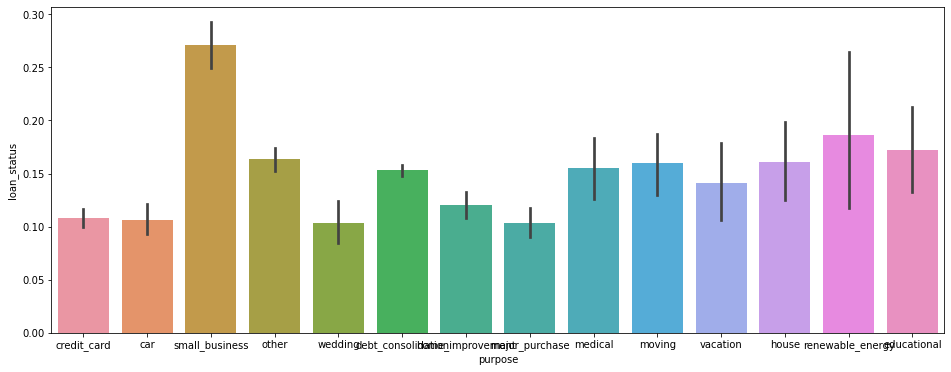

In [53]:
#purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize = (16, 6))
plot_cat('purpose')

In the upcoming analysis, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate. 

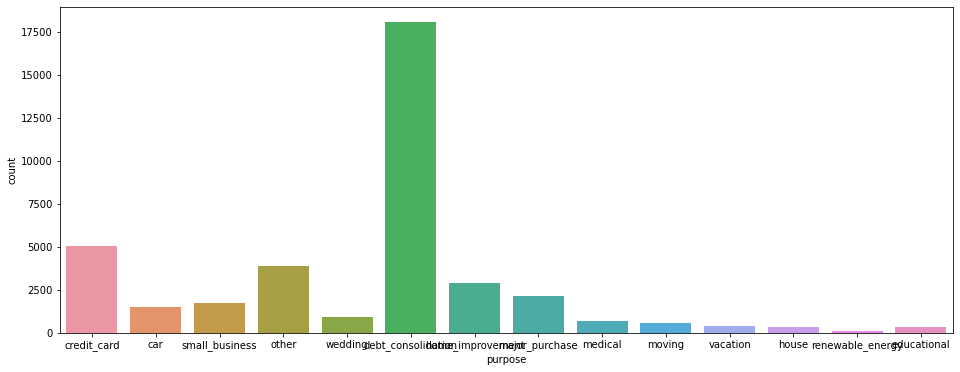

In [54]:
#lets first look at the number of loans for each type (purpose) of the loan
#most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize = (16, 6))
sns.countplot(x = 'purpose', data = df)
plt.show()

Let's analyse the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [55]:
#filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

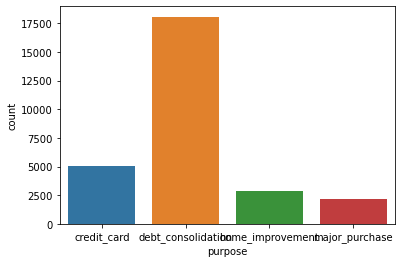

In [56]:
#plotting number of loans by purpose 
sns.countplot(x = df['purpose'])
plt.show()

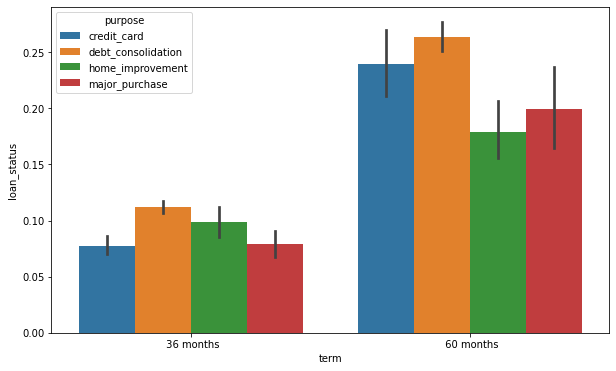

In [57]:
#let's now compare the default rates across two types of categorical variables
#purpose of loan (constant) and another categorical variable (which changes)
plt.figure(figsize = [10, 6])
sns.barplot(x = 'term', y = "loan_status", hue = 'purpose', data = df)
plt.show()

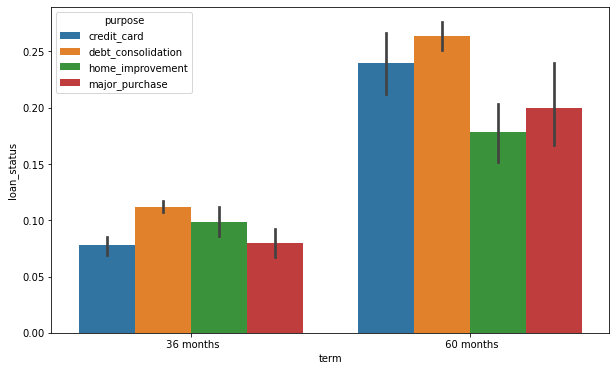

In [58]:
#lets write a function which takes a categorical variable and plots the default rate
#segmented by purpose 
def plot_segmented(cat_var):
    plt.figure(figsize = (10, 6))
    sns.barplot(x = cat_var, y = 'loan_status', hue = 'purpose', data = df)
    plt.show()

plot_segmented('term')

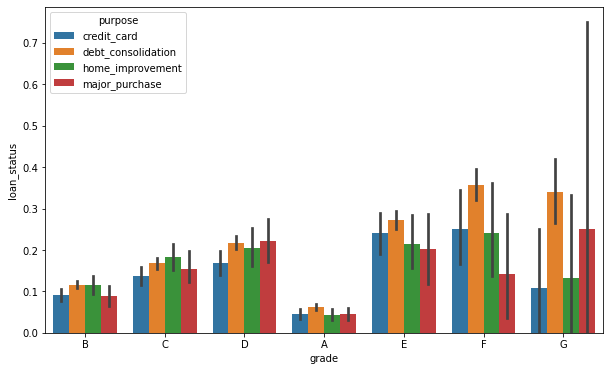

In [59]:
#grade of loan
plot_segmented('grade')

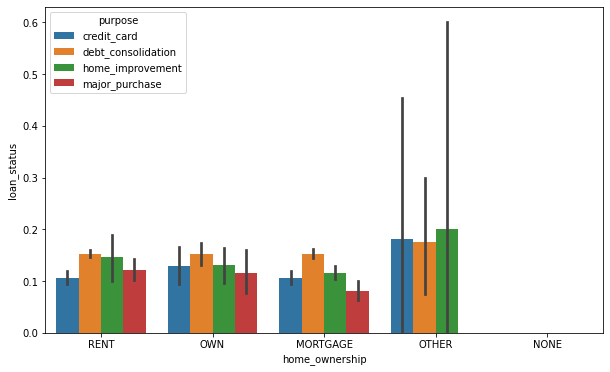

In [60]:
#home ownership 
plot_segmented('home_ownership')

In general, debt consolidation loans have the highest default rates. Lets compare across other categories as well.

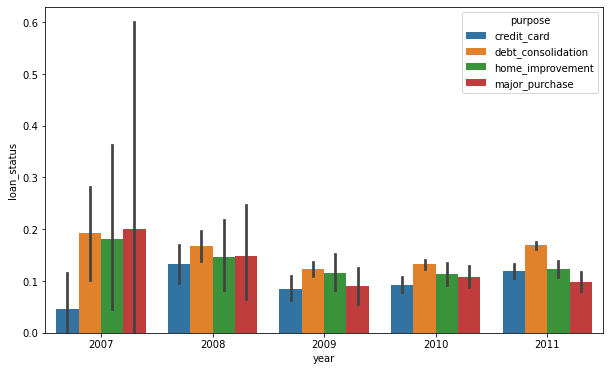

In [61]:
#year
plot_segmented('year')

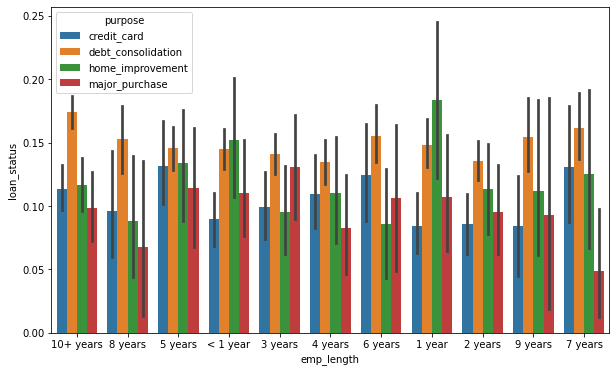

In [62]:
#emp_length
plot_segmented('emp_length')

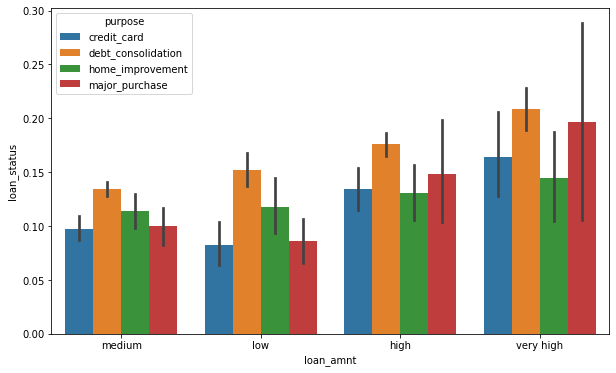

In [63]:
#loan_amnt: same trend across loan purposes
plot_segmented('loan_amnt')

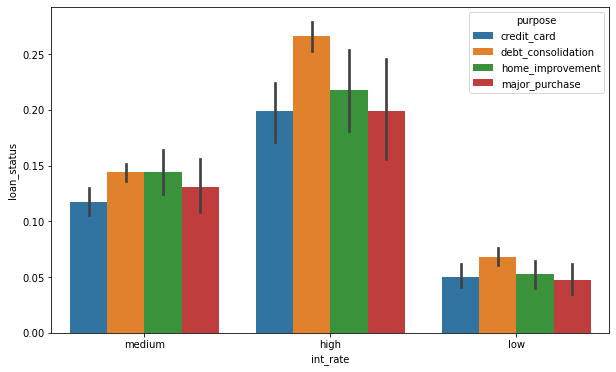

In [64]:
#interest rate
plot_segmented('int_rate')

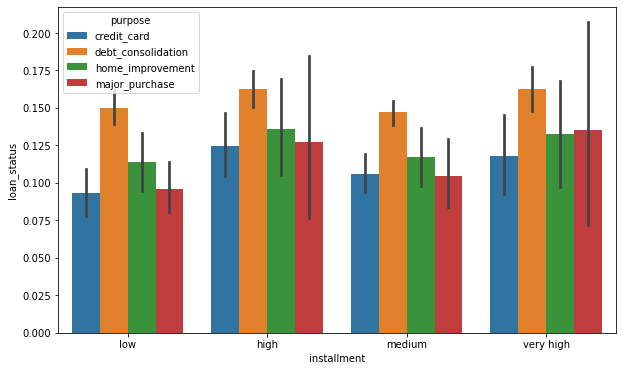

In [65]:
#installment
plot_segmented('installment')

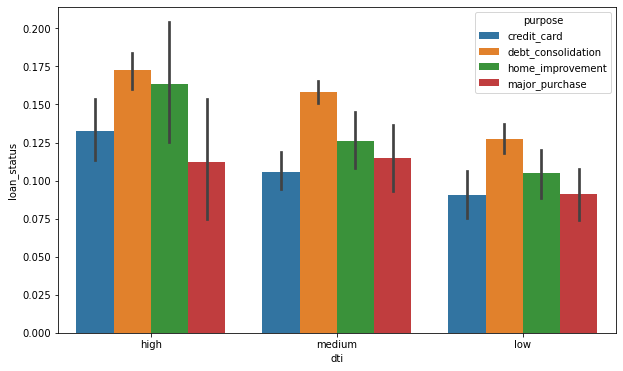

In [66]:
#debt to income ratio
plot_segmented('dti')

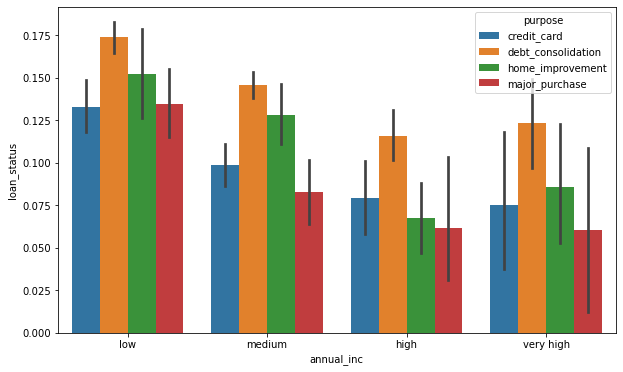

In [67]:
#annual income
plot_segmented('annual_inc')

A good way to quantify th effect of a categorical variable on default rate is to see 'how much does the default rate vary across the categories'. 

Let's see an example using annual_inc as the categorical variable.

In [68]:
#variation of default rate across annual_inc
df.groupby('annual_inc').loan_status.mean().sort_values(ascending = False)

annual_inc
low          0.161748
medium       0.130881
very high    0.101742
high         0.097032
Name: loan_status, dtype: float64

In [69]:
#one can write a function which takes in a categorical variable and computed the average 
#default rate across the categories
#it can also compute the 'difference between the highest and the lowest default rate' across the 
#categories, which is a decent metric indicating the effect of the varaible on default rate

def diff_rate(cat_var):
    default_rates = df.groupby(cat_var).loan_status.mean().sort_values(ascending = False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)

annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


Thus, there is a 6% increase in default rate as you go from high to low annual income. We can compute this difference for all the variables and roughly identify the ones that affect default rate the most.

In [70]:
#filtering all the object type variables
df_categorical = df.loc[:, df.dtypes == object]
df_categorical['loan_status'] = df['loan_status']

#Now, for each variable, we can compute the incremental diff in default rates
print([i for i in df.columns])

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'month', 'year']


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11752\2232611170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['loan_status'] = df['loan_status']


In [71]:
#storing the diff of default rates for each column in a dict
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 7.000000000000001, 'funded_amnt': 5.0, 'funded_amnt_inv': 6.0, 'term': 15.0, 'int_rate': 19.0, 'installment': 2.0, 'grade': 27.0, 'sub_grade': 44.0, 'emp_title': 100.0, 'emp_length': 3.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 5.0, 'dti': 5.0, 'initial_list_status': 0.0}
